Tutorial 9: Summary
===================

In this chapter, you've learnt how create and fit strong lenses with PyAutoLens. In particular, you've learnt:

 1) PyAutoLens uses Cartesian _Grid_'s of (y,x) coordinates to perform ray-tracing.
 2) These _Grid_'s are combined with light and mass profiles to compute images, convergences, potentials and
 deflection angles.
 3) Profiles are combined to make galaxies.
 4) Collections of galaxies (at the same redshift) form a plane.
 5) A _Tracer_ can make an image-plane + source-plane strong lens system.
 6) The Universe's cosmology can be input into this _Tracer_ to convert unit_label to physical values.
 7) The tracer's image can be used to simulate strong lens _Imaging_ observed on a real telescope.
 8) This instrument can be fitted, so to as quantify how well a model strong lens system represents the observed image.

In this summary, we'll consider how flexible the tools PyAutoLens gives you are to study every aspect of a strong lens
system. Lets get a 'fit' to a strong lens, by setting up an image, mask, tracer, etc.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

We'll need the path to the chapter in this tutorial to load the dataset from your hard-disk.

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


The data path specifies where the data was output in the last tutorial, which is the directory 'chapter_path/data'

In [3]:
dataset_path = f"{workspace_path}/howtolens/dataset/chapter_1/"

Below, we do all the steps we learned this chapter - making _Galaxy_'s a tracer, fitting the data, etc.

In [4]:
imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

mask = al.Mask.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=2, radius=3.0
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0), einstein_radius=1.6, elliptical_comps=(0.17647, 0.0)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=4.0,
    ),
    disk=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        elliptical_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=1.0,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

The fit contains our _Tracer_, which contains _Planes_, which contains _Galaxy_'s which contains _Profile_'s:

In [5]:
print(fit)
print()
print(fit.tracer)
print()
print(fit.tracer.image_plane)
print()
print(fit.tracer.source_plane)
print()
print(fit.tracer.image_plane.galaxies[0])
print()
print(fit.tracer.source_plane.galaxies[0])
print()
print(fit.tracer.image_plane.galaxies[0].mass)
print()
print(fit.tracer.source_plane.galaxies[0].bulge)
print()
print(fit.tracer.source_plane.galaxies[0].disk)
print()





Redshift: 0.5
Mass Profiles:
EllipticalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.17647, 0.0)
axis_ratio: 0.700000850000425
phi: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

Redshift: 1.0
Light Profiles:
EllipticalSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0
EllipticalSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0

EllipticalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.17647, 0.0)
axis_ratio: 0.700000850000425
phi: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

EllipticalSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0

EllipticalSersic
centre: (0.1, 0.1)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensit

Using the plotters we've used throughout this chapter, we can visualize any aspect of a fit we're interested in. 
For example, if we want to plot the image of the source galaxy _MassProfile_, we can do this in a variety of 
different ways

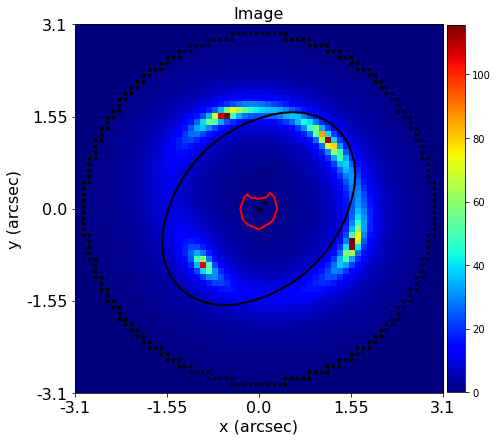

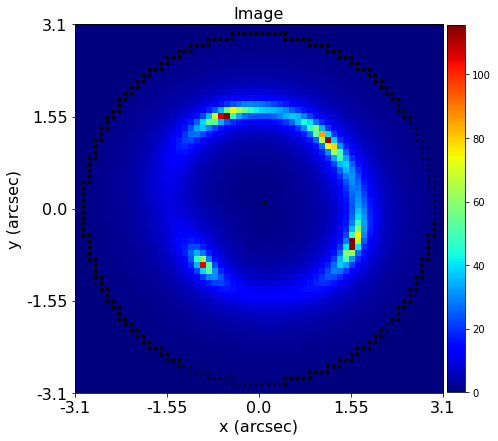

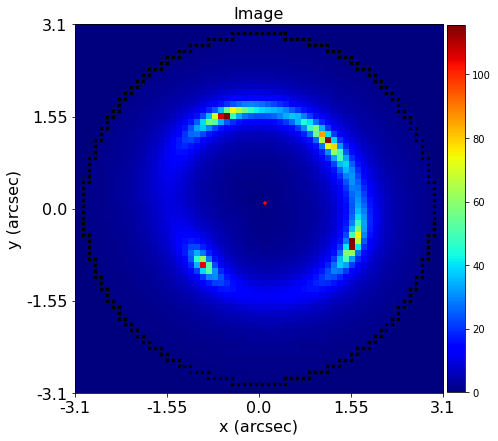

In [6]:
aplt.Tracer.image(tracer=fit.tracer, grid=masked_imaging.grid)

source_plane_grid = tracer.traced_grids_of_planes_from_grid(grid=masked_imaging.grid)[1]
aplt.Plane.image(plane=fit.tracer.source_plane, grid=source_plane_grid)

aplt.Galaxy.image(galaxy=fit.tracer.source_plane.galaxies[0], grid=source_plane_grid)

As our fit and ray-tracing becomes more complex, it is useful to know how to decompose their different attributes to 
extract different things about them. For example, we made our source-galaxy above with two _LightProfile_'s, a 
'bulge' and 'disk. We can plot the image of each component individually, if we know how to break-up the different 
components of the fit and _Tracer_.

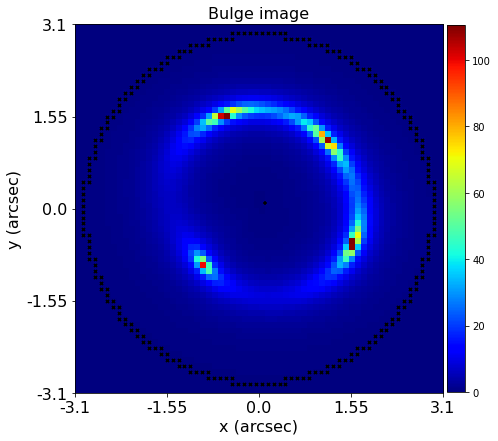

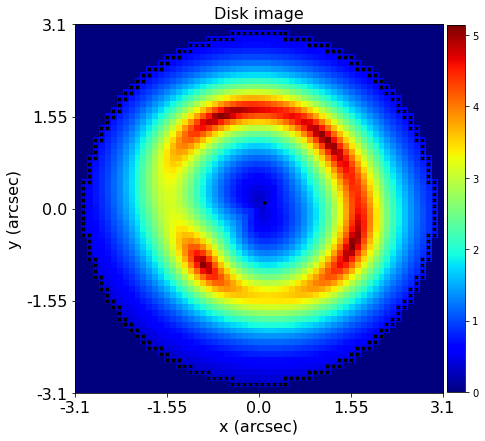

In [7]:
aplt.LightProfile.image(
    light_profile=fit.tracer.source_plane.galaxies[0].bulge,
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Bulge image")),
)

aplt.LightProfile.image(
    light_profile=fit.tracer.source_plane.galaxies[0].disk,
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Disk image")),
)

And, we're done, not just with the tutorial, but the chapter!

To end, I want to quickly talk about code-design and structure. Yeah, I know, as a scientist, you don't like code 
and certainly don't want to think about code! However, the point is, with PyAutoLens, you don't need to!

Think about it - throughout this chapter, we never talk about anything like it was code. We didn't refer to 
'variables', 'parameters' and 'functions' did we? Instead, we talked about 'galaxies', 'planes' and a _Tracer_. 
These are the things that, as scientists, we use to visualize a strong lens system.

Software that abstracts the underlying code in this way follows what is called an 'object-oriented design', and it 
is our hope with PyAutoLens that we've made the way you use it (that is, in coding speak, its 'interface') intuitive.

However, if you do enjoy code, variables, functions, and parameters, you're probably ready to take a look at the 
PyAutoLens source-code. This can be found in the 'autolens' folder. At team PyAutoLens, we take a lot of pride in our 
source-code, so I can promise you its well written, well documented and thoroughly tested (check out the 'test' 
directory if you're curious how to test code well!).

Okay, enough self-serving praise for PyAutoLens, lets wrap up the chapter. You've learn a lot in this chapter, but 
what you haven't learnt is how to 'model' a real strong gravitational lens.

In the real world, we've no idea what the 'correct' set of light and mass profile parameters are that will give a 
good fit to a lens. Lens modeling is the process of finding the lens model which provides the best-fit, and that will 
be the focus of our next set of tutorials.